1 Dec 2024
**Spam detection in Emails**

they use 3 approaches:

1. statistical way : using nltk ,tfidf

**tf-term frequency**: sum of no of times a word/term is coming divided by no. of sentences in every document

**idf- inverse document frequency** : its a log( sentence count that has the word/term divided by total no. of sentences present)

**tfidf** = tf * idf(tfidf is b/w 0-1)

Higher weights are assigned to more frequent terms mostly stopwords

documents means sentences here.

In [ ]:
# import the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
#cli method to get data from kaggle

! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shrutinigamsahil","key":"e3f727adf44e9f0691159f15df5add54"}'}

In [ ]:
# create a directory and folder
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# download data
#!/bin/bash
!kaggle datasets download shantanudhakadd/email-spam-detection-dataset-classification

Dataset URL: https://www.kaggle.com/datasets/shantanudhakadd/email-spam-detection-dataset-classification
License(s): other
  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 75.1MB/s]


In [ ]:
! unzip email-spam-detection-dataset-classification.zip

Archive:  email-spam-detection-dataset-classification.zip
  inflating: spam.csv                


In [ ]:

# load data

df = pd.read_csv('/content/spam.csv',encoding='latin1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# dropping unnecessary columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
# change the names of the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()



,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# column width full
pd.set_option('display.max_colwidth',None)

In [ ]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [ ]:
# EDA

In [ ]:
df.shape

(5572, 2)

target
ham     4825
spam     747
Name: count, dtype: int64


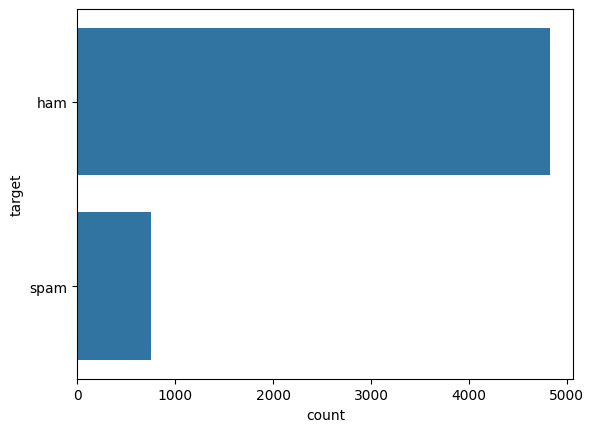

In [ ]:
# count ham and spams

sns.countplot(df['target'])
print(df['target'].value_counts())

plt.show()

In [ ]:
# Lexical analysis



In [ ]:
# extract text part
new_df = df.copy()

  # drop the target
new_df.drop(columns=['target'],inplace=True)




In [ ]:
# preprocess text

# make the text column into token
new_df['text'] = new_df['text'].apply(lambda x: nltk.word_tokenize(x))
# remove the stopwords

stop_words = stopwords.words('english')
new_df['text'] = new_df['text'].apply(lambda x: [item for item in x if item not in stop_words and item.isalpha()])

# frequency
from nltk.probability import FreqDist
freq = FreqDist()
for text in new_df['text']:
  for token in text:
    freq[token] += 1

# top 10 words

print(freq.most_common(10))



[('I', 1956), ('u', 780), ('call', 392), ('U', 353), ('get', 334), ('gt', 318), ('lt', 316), ('ur', 294), ('You', 286), ('know', 255)]


In [ ]:
# phonetic hashin with whose help i can find similar counding words and remove them

In [ ]:
# Stemming
# trying to make the root words from their variants
# Here capitals and smalls are merged
ps = PorterStemmer()

new_df['text'] = new_df['text'].apply(lambda x: [ps.stem(y) for y in x])

# frequency
from nltk.probability import FreqDist
freq = FreqDist()
for text in new_df['text']:
  for token in text:
    freq[token] += 1

# top 10 words

print(freq.most_common(10))


[('i', 1956), ('u', 1133), ('call', 656), ('go', 451), ('get', 445), ('ur', 381), ('you', 340), ('gt', 318), ('lt', 316), ('come', 300)]


In [ ]:
# lemmatization

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

# proess text with lemmatizer
new_df['text'] = new_df['text'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  # frequency
from nltk.probability import FreqDist
freq = FreqDist()
for text in new_df['text']:
  for token in text:
    freq[token] += 1

# top 10 words

print(freq.most_common(10))




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


[('i', 1956), ('u', 1197), ('call', 656), ('go', 451), ('get', 445), ('ur', 381), ('you', 340), ('gt', 318), ('lt', 316), ('come', 300)]


In [ ]:
# top 10 words

print(freq.most_common(20))

[('i', 1956), ('u', 1197), ('call', 656), ('go', 451), ('get', 445), ('ur', 381), ('you', 340), ('gt', 318), ('lt', 316), ('come', 300), ('free', 278), ('know', 274), ('ok', 266), ('like', 257), ('love', 251), ('got', 249), ('time', 247), ('want', 244), ('good', 242), ('day', 242)]


In [ ]:

# cannonicalization by phonetichashing
# soundex algorithm
! pip install soundex



  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for soundex: filename=soundex-1.1.3-py3-none-any.whl size=8876 sha256=2fec51e4e14dc83e45bed52cad5ed58aaa72f093951dd1cc30d9476156fc94ae
  Stored in directory: /root/.cache/pip/wheels/a7/c7/c0/99e0278924f5664ab201bee9eee6e7a856caabf95a6fe008c5
  Created wheel for silpa_common: filename=silpa_common-0.3-py3-none-any.whl size=8469 sha256=67438fd2e1b6c32d3008b461fb6a0111d394455d0733857750bb54667e2f7dc3
  Stored in directory: /root/.cache/pip/wheels/c0/72/43/0c779b79d708c78240beb3b0bb8f5ff3c2ab81c4e5271ea1aa
Successfully built soundex silpa_common


In [ ]:
# use soundex
from soundex import Soundex
soundex = Soundex()

In [ ]:
# implement logic of phonetic hashing

def phonetic_hash(word):
  return soundex.soundex(word)

In [ ]:
phonetic_hash("Hllo")

'H4'

In [ ]:
phonetic_hash("No")

'N'

In [ ]:
# use the method

phonetic_hash("Hello")

'H4'

In [ ]:

phonetic_hash("hilo")

'h4'

In [ ]:

phonetic_hash("Delhi")

'D4'

In [ ]:

phonetic_hash("Dili")

'D4'

In [ ]:
phonetic_hash("ours")

'o62'

In [ ]:
phonetic_hash("hours")

'h62'

In [ ]:
phonetic_hash("u")

'u'

In [ ]:
phonetic_hash("you")

'y'

In [ ]:
# process the text word by word to see the matching hashing
sound_dict = dict()
for word in freq:
    sound_dict[word] = phonetic_hash(word)
    print(word,sound_dict[word])


Streaming output truncated to the last 5000 lines.
sport s163
accept a213
cake c2
pete p3
round r53
urself u6241
basic b2
bluetooth b43
refer r16
mistak m232
al a4
kinda k53
result r243
depend d153
meh m
over o16
near n6
hotel h34
hurri h6
noon n5
xy x
onc o52
add a3
subscrib s1261
bid b3
chariti c63
wed w3
tampa t51
user u26
mid m3
sale s4
gay g
wear w6
hiya h
digit d23
doctor d236
deliv d41
nobodi n13
mode m3
bb b1
moral m64
share s6
total t34
natur n36
arriv a61
veri v6
list l23
thinkin t525
flag f42
colleagu c42
sofa s1
cup c1
entitl e534
anymor a56
pizza p2
clear c46
quick q2
learn l65
roommat r53
letter l36
nigeria n26
ice i2
cinema c5
spent s153
pleasur p426
troubl t614
ave a1
weight w23
inc i52
bother b36
bak b2
dvd d13
sp s1
becom b25
goto g3
experi e216
net n3
freephon f615
howev h1
settl s34
success s2
slept s413
file f4
goodnight g3523
tnc t52
lem l5
celebr c416
imagin i525
definit d153
woman w5
wiv w1
practic p6232
fault f43
weed w3
pictur p236
facebook f212
none n5
yahoo 

<Axes: xlabel='Samples', ylabel='Counts'>

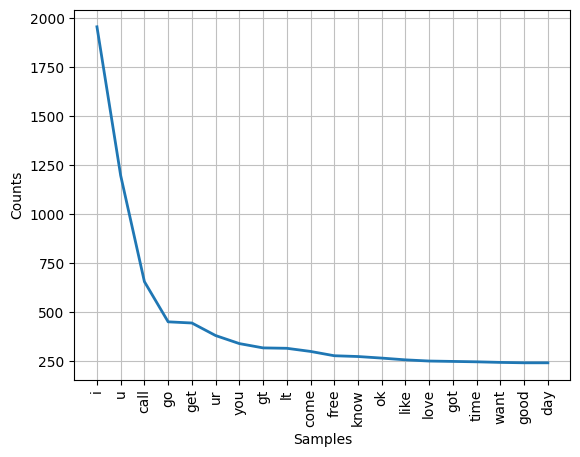

In [ ]:
freq.plot(20,cumulative=False)

In [ ]:
freq.keys()

dict_keys(['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat', 'ok', 'lar', 'joke', 'wif', 'u', 'oni', 'free', 'entri', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', 'may', 'text', 'receiv', 'question', 'std', 'txt', 'rate', 't', 'c', 'appli', 'dun', 'say', 'earli', 'hor', 'alreadi', 'nah', 'i', 'think', 'goe', 'usf', 'live', 'around', 'though', 'freemsg', 'hey', 'darl', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'xxx', 'chg', 'send', 'rcv', 'even', 'brother', 'speak', 'they', 'treat', 'aid', 'patent', 'a', 'per', 'request', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', 'copi', 'friend', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'to', 'claim', 'call', 'code', 'valid', 'hour', 'had', 'mobil', 'month', 'r', 'entitl', 'updat', 'latest', 'colour', 'camera', 'the', 'co', 'gon', 'na', 'home', 'soon', 'want', 'talk', 'st

In [ ]:
sound_dict

{'i': 'i',
 'u': 'u',
 'call': 'c4',
 'go': 'g',
 'get': 'g3',
 'ur': 'u6',
 'you': 'y',
 'gt': 'g3',
 'lt': 'l3',
 'come': 'c5',
 'free': 'f6',
 'know': 'k5',
 'ok': 'o2',
 'like': 'l2',
 'love': 'l1',
 'got': 'g3',
 'time': 't5',
 'want': 'w53',
 'good': 'g3',
 'day': 'd',
 'text': 't23',
 'it': 'i3',
 'send': 's53',
 'no': 'n',
 'need': 'n3',
 'one': 'o5',
 'txt': 't23',
 'how': 'h',
 'today': 't3',
 'r': 'r',
 'see': 's',
 'take': 't2',
 'think': 't52',
 'home': 'h5',
 'lor': 'l6',
 'repli': 'r14',
 'sorri': 's6',
 'stop': 's31',
 'tell': 't4',
 'still': 's34',
 'back': 'b2',
 'c': 'c',
 'do': 'd',
 'mobil': 'm14',
 'da': 'd',
 'n': 'n',
 'make': 'm2',
 'but': 'b3',
 'if': 'i1',
 'we': 'w',
 'hi': 'h',
 'what': 'w3',
 'phone': 'p5',
 'new': 'n',
 'say': 's',
 'a': 'a',
 'dont': 'd53',
 'plea': 'p4',
 'work': 'w62',
 'later': 'l36',
 'so': 's',
 'week': 'w2',
 'ask': 'a2',
 'hope': 'h1',
 'miss': 'm2',
 'just': 'j23',
 'pl': 'p4',
 'my': 'm',
 'meet': 'm3',
 'the': 't',
 'your': 'y6

In [ ]:
# Preparing the data for features

# create a single list of all terms in given text
all_terms = []
for text in new_df['text']:
  all_terms.extend(text)

# import tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(all_terms)




TfidfVectorizer()

In [ ]:
# print the results
print(tfidf.vocabulary_)

{'go': 2066, 'jurong': 2688, 'point': 3845, 'crazi': 1125, 'avail': 367, 'bugi': 712, 'great': 2133, 'world': 5756, 'la': 2785, 'buffet': 710, 'cine': 933, 'got': 2102, 'amor': 183, 'wat': 5587, 'ok': 3540, 'lar': 2813, 'joke': 2660, 'wif': 5684, 'oni': 3565, 'free': 1918, 'entri': 1603, 'wkli': 5724, 'comp': 1016, 'win': 5694, 'fa': 1712, 'cup': 1170, 'final': 1804, 'tkt': 5198, 'may': 3101, 'text': 5087, 'receiv': 4130, 'question': 4050, 'std': 4817, 'txt': 5346, 'rate': 4093, 'appli': 254, 'dun': 1489, 'say': 4363, 'earli': 1505, 'hor': 2356, 'alreadi': 161, 'nah': 3329, 'think': 5135, 'goe': 2070, 'usf': 5453, 'live': 2913, 'around': 292, 'though': 5151, 'freemsg': 1924, 'hey': 2292, 'darl': 1214, 'week': 5615, 'word': 5750, 'back': 401, 'like': 2885, 'fun': 1965, 'still': 4838, 'tb': 5044, 'xxx': 5808, 'chg': 893, 'send': 4430, 'rcv': 4103, 'even': 1646, 'brother': 686, 'speak': 4729, 'they': 5128, 'treat': 5293, 'aid': 119, 'patent': 3708, 'per': 3740, 'request': 4199, 'mell': 31

In [ ]:

# splitting classifier for training and test data
# classifier
from nltk import NaiveBayesClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

X_train,X_test,y_train,y_test = train_test_split(new_df['text'],df['target'],test_size=0.2,random_state=42)

# Create a pipeline with TfidfVectorizer and MultinomialNB
clf = Pipeline([('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

# Fit the pipeline on the training data
clf.fit(X_train.astype(str), y_train) # Convert X_train to string type

# Predict on the test data
y_pred = clf.predict(X_test.astype(str)) # Convert X_test to string type

# Print the accuracy score
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))


0.9632286995515695
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.73      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



0.9632286995515695
